In [380]:
# from google.colab import files
# uploaded = files.upload()


In [381]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
boston = pd.read_csv(io.BytesIO(uploaded['boston.csv']))

In [382]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [383]:
boston.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [384]:
boston.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [385]:
boston.duplicated().sum()

0

In [386]:
boston=boston.drop(['Unnamed: 0'],axis=1)
copy = boston

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dbd407278>,
      dtype=object)

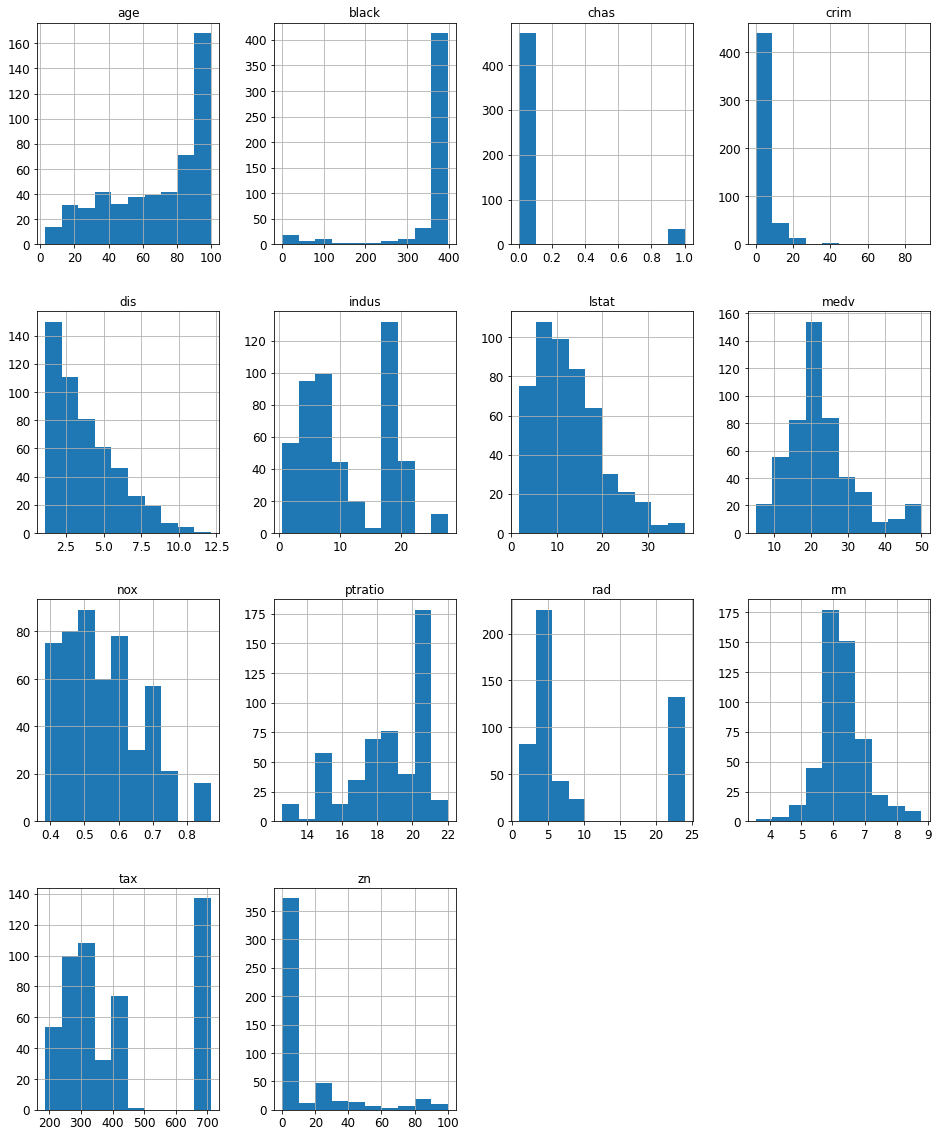

In [387]:
boston.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12)

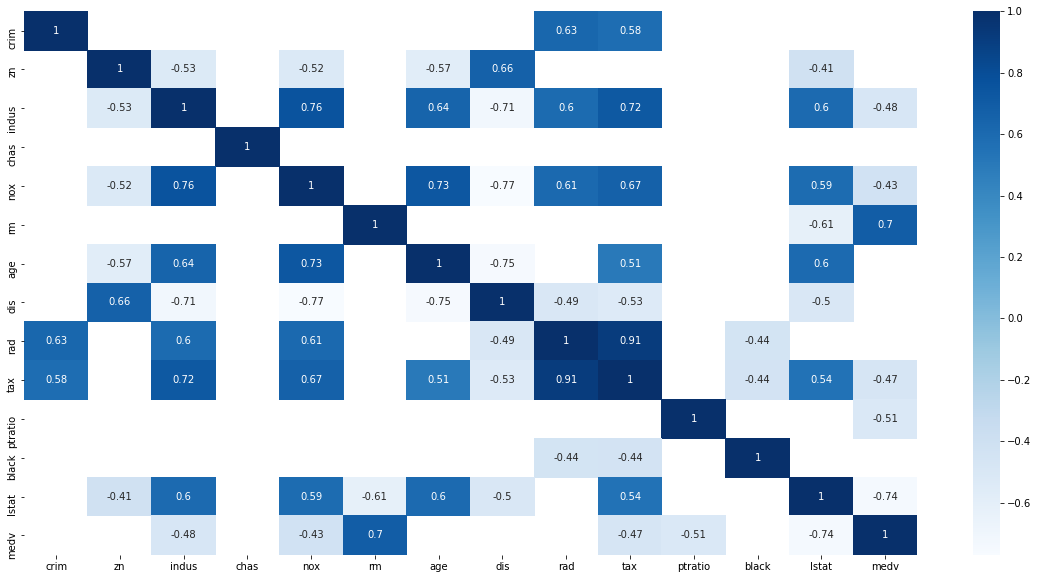

In [388]:
cor=boston.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],annot=True,cmap='Blues')

In [389]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


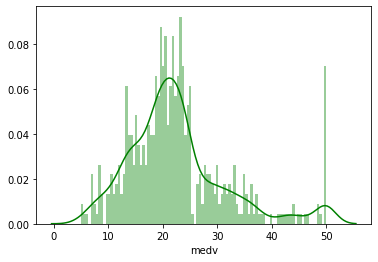

In [390]:
sns.distplot(boston['medv'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [391]:
boston.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
Name: medv, dtype: float64

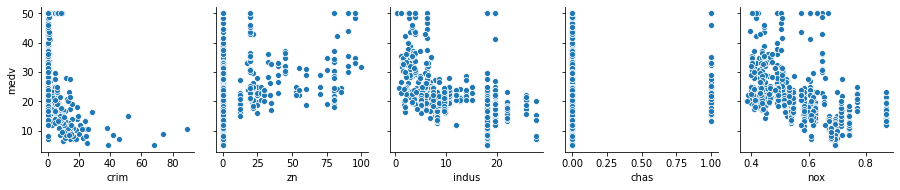

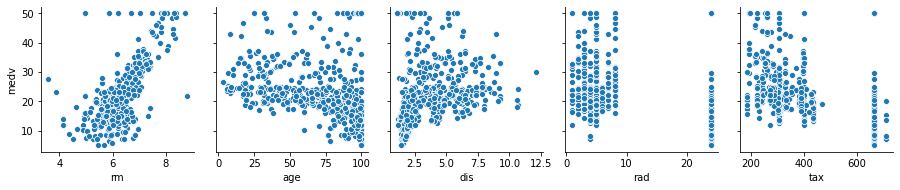

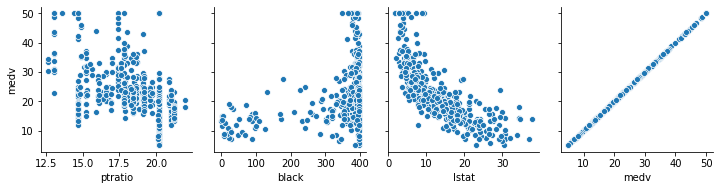

In [392]:
for i in range(0, len(boston.columns), 5):
    sns.pairplot(data=boston,
                x_vars=boston.columns[i:i+5],
                y_vars=['medv'])

In [393]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [394]:
y=boston['medv']

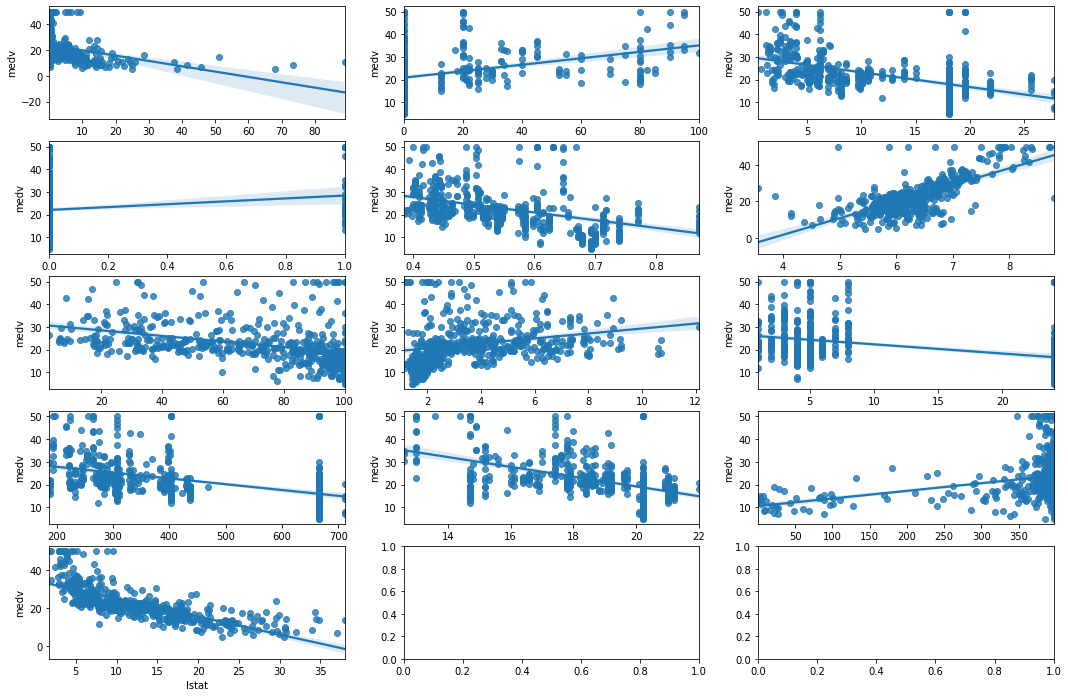

In [395]:
fig, ax = plt.subplots(round(len(boston.columns) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(boston.columns) - 1:
        sns.regplot(x=boston.columns[i],y='medv',data=boston[boston.columns], ax=ax)

In [396]:
#dropping columns that are unnecessary to increase accuracy
boston = copy
boston=boston.drop('medv',axis=1)

boston=boston.drop('rad',axis=1)#neg cor -0.381626
boston=boston.drop('indus',axis=1)#neg cor -0.483725
boston=boston.drop('tax',axis=1)#neg cor -0.468536

# boston=boston.drop('crim',axis=1)#neg cor -0.388305
# boston=boston.drop('nox',axis=1)#neg cor -0.427321
# boston=boston.drop('age',axis=1)#neg cor -0.376955

# boston=boston.drop('ptratio',axis=1)#neg cor -0.507787
# boston=boston.drop('lstat',axis=1)#neg cor -0.737663

# boston=boston.drop('zn',axis=1) #pos cor 0.360445
# boston=boston.drop('chas',axis=1) #pos cor 0.175260
# boston=boston.drop('rm',axis=1) #pos cor 0.695360
# boston=boston.drop('dis',axis=1)#pos cor 0.249929
# boston=boston.drop('black',axis=1)#pos cor 0.333461

In [397]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   chas     506 non-null    int64  
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   ptratio  506 non-null    float64
 8   black    506 non-null    float64
 9   lstat    506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


In [398]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [399]:
x_train,x_test,y_train,y_test=train_test_split(boston,y,test_size=0.3)

In [400]:
y_train.shape

(354,)

In [401]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [402]:
y_pred = reg.predict(x_test)

In [403]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df2 = df1.head(10)

In [404]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared error', r2_score(y_test, y_pred))
print("Training Accuracy" , reg.score(x_train , y_train))
print("Testing Accuracy" , reg.score(x_test , y_test))


MAE 3.3850538094607714
MSE 23.77317412279004
RMSE 4.875774207527461
R squared error 0.7154102570401959
Training Accuracy 0.7306846522512491
Testing Accuracy 0.7154102570401958


In [405]:
import sklearn
print (sklearn.__version__)
print (pd.__version__)
print (np.__version__)
print (sns.__version__)
import matplotlib
print (matplotlib.__version__)
import sys
sys.version

0.22.2.post1
1.0.5
1.18.5
0.10.1
3.2.2


'3.6.9 (default, Jul 17 2020, 12:50:27) \n[GCC 8.4.0]'

In [406]:
from joblib import dump , load
dump(reg  , "boston.joblib")

['boston.joblib']

In [407]:
boston.head()

,crim,zn,chas,nox,rm,age,dis,ptratio,black,lstat
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [408]:
arr = [0.00632, 18.0, 0.0, 0.538, 6.575, 65.2, 4.0900, 15.3, 396.90, 4.98]
array = np.array([arr])
print(array)

[[6.320e-03 1.800e+01 0.000e+00 5.380e-01 6.575e+00 6.520e+01 4.090e+00
  1.530e+01 3.969e+02 4.980e+00]]


In [409]:
prediction = reg.predict(array)
prediction[0]

31.069873795795964

In [410]:
loaded_regressor = load('boston.joblib') 
prediction = loaded_regressor.predict(array)
prediction[0]

31.069873795795964